# CORAL domain adaptation applied on 2D gaussians
Implementation of [this paper](https://arxiv.org/pdf/1511.05547.pdf) on gaussians

In [407]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_moons, make_blobs

## Generate the data

### Create moons

In [438]:
N_points = 100

In [439]:
X = make_moons(N_points, noise=0.1)

In [440]:
X_source = X[0][X[1] == 0]

In [441]:
X_target = X[0][X[1] == 1]

### Create gaussians

In [452]:
X = make_blobs(N_points, centers=[[0,0], [0,0]])

In [453]:
X_source = np.dot(X[0][X[1] == 0], [[2, 0], [0, 0.1]])
X_source = np.dot(X_source, [[np.cos(np.pi/4), np.sin(np.pi/4)], [-np.sin(np.pi/4), np.cos(np.pi/4)]])

In [454]:
X_target = np.dot(X[0][X[1] == 1], [[0.1, 0], [0, 2]])
X_target = np.dot(X_target, [[np.cos(np.pi/4), np.sin(np.pi/4)], [-np.sin(np.pi/4), np.cos(np.pi/4)]])

### Normalize

In [455]:
def normalize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [456]:
X_source = normalize(X_source)

In [457]:
X_target = normalize(X_target)

### Display the data

In [458]:
def display(X_s, X_t):
    plt.rcParams['figure.figsize'] = (10, 7)
    plt.axis("equal")
    plt.axis([-4,4,-4,4])

    plt.scatter(X_s[:,0], X_s[:,1], label="source")
    plt.scatter(X_t[:,0], X_t[:,1], label="target")
    plt.legend()

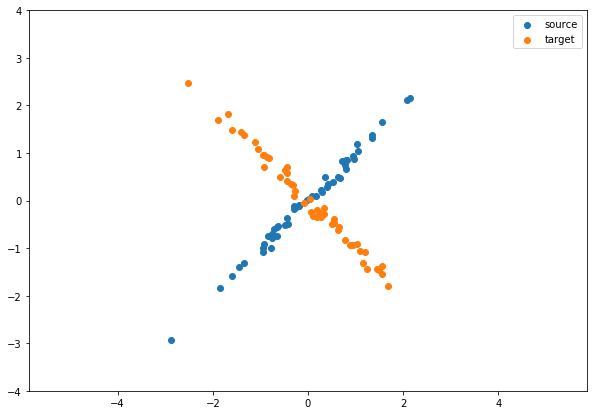

In [459]:
display(X_source, X_target)

## Run the algorithm

In [460]:
lamda = 0

In [461]:
C_source = np.cov(X_source, rowvar=False) + lamda * np.eye(X_source.shape[1])
C_target = np.cov(X_target, rowvar=False) + lamda * np.eye(X_target.shape[1])

In [462]:
A_coral = np.dot(sp.linalg.sqrtm(sp.linalg.inv(C_source)), sp.linalg.sqrtm(C_target))

In [463]:
# X_source_whitened = np.dot(X_source, sp.linalg.sqrtm(sp.linalg.inv(C_source)))

In [464]:
X_source_coral = np.dot(X_source, A_coral)

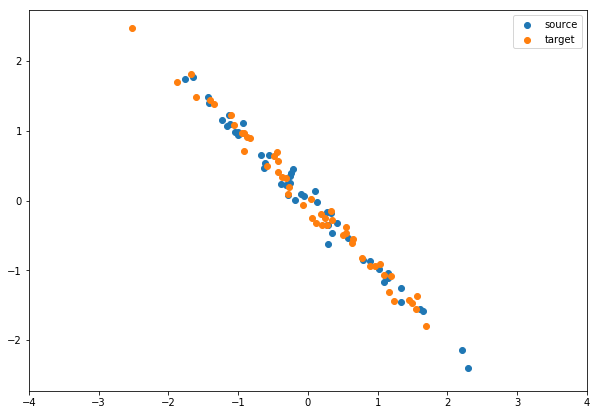

In [465]:
display(X_source_coral, X_target)

In [386]:
X_source_coral.shape

(50, 2)

In [387]:
A_coral.shape

(2, 2)

In [388]:
A_coral

array([[ 7.37324531, -7.32716695],
       [-7.32716695,  7.37324531]])

In [451]:
C_target

array([[ 0.50160241, -0.00689522],
       [-0.00689522,  0.10928801]])

In [450]:
np.cov(X_source_coral, rowvar=False)

array([[ 0.50160241, -0.00689522],
       [-0.00689522,  0.10928801]])

In [392]:
np.dot(np.dot(A_coral.T, C_source), A_coral)

array([[ 1.02040816, -1.01609508],
       [-1.01609508,  1.02040816]])